In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from pathlib import Path
import os

In [2]:
def extract_table_and_avg(benchmark_dir: Path):
    ctx_lengths = [x for x in os.listdir(benchmark_dir)]
    joint_table = []

    for ctx_length in ctx_lengths:
        # print(os.listdir(benchmark_dir / ctx_length / "pred" ))
        data = pd.read_csv(benchmark_dir / ctx_length / "pred" / "summary.csv", header=1)
        data["ctx_length"] = int(ctx_length)
        joint_table.append(data)

    joint_table[0]
    joint_data = pd.concat(joint_table)
    joint_data = joint_data[joint_data['Tasks'] != "Nulls"]
    joint_data = joint_data.set_index("ctx_length")
    joint_data_avg = joint_data[[col for col in joint_data.columns if col not in ("ctx_length", "Tasks")]]
    joint_data_avg = joint_data_avg.values.astype('float32').mean(axis=1)
    # print(joint_data_avg)
    joint_data['avg'] = joint_data_avg

    joint_data_avg_tab = joint_data['avg']

    joint_data = joint_data.sort_index()

    return joint_data, joint_data_avg_tab

def plot_table(name, data, savefig=True, benchmark_dir: Path = Path("")):
    from matplotlib import pyplot as plt
    df = data
    for col in df.columns:
        if col not in ['Tasks', 'avg']:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # Plot
    fig, ax = plt.subplots(figsize=(12, 8))
    for col in df.columns:
        if col not in ['Tasks', 'avg']:
            ax.plot(df.index, df[col], label=col, alpha=0.7)

    # Plot "avg" with a bold line
    ax.plot(df.index, df['avg'], label='avg', linewidth=2.5, color='black')

    # Add labels, legend, and grid
    ax.set_xlabel('Context Length', fontsize=12)
    ax.set_ylabel('Accuracy [%]', fontsize=12)
    ax.set_title(f'RULER tasks - {name}', fontsize=14)
    ax.set_xscale('log')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax.grid(True)

    fig.savefig(benchmark_dir / f"summary_{name}.svg")
    
def plot_avg_table(data, savefig=True, benchmark_dir: Path = Path("."), plotname: str = ""):
    from matplotlib import pyplot as plt
    df = pd.concat(data, axis=1)
    # merged_df.columns = merged_df.columns.droplevel(1)
    df = df.sort_index()

    columns = list(data)
    fig, ax = plt.subplots(figsize=(12, 8))
    # Plot "avg" with a bold line
    for column in columns:
        ax.plot(df.index, df[column], linewidth=2.5, label=column)

    # Add labels, legend, and grid
    ax.set_xlabel('Context Length', fontsize=12)
    ax.set_ylabel('Accuracy [%]', fontsize=12)
    ax.set_title('RULER tasks', fontsize=14)
    ax.set_xscale('log')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax.grid(True)

    if plotname:
        fig.savefig(benchmark_dir / f"summary_averages_{plotname}.svg")
    else:
        fig.savefig(benchmark_dir / f"summary_averages.svg")
    


## Aggregate results

In [3]:
base_path = Path(f"./scripts/benchmark_root/")
models = ["xLSTM-7b", "xLSTM-7b-longctx", "falcon-mamba-7b", "llama3.1-8b", "llama-2-7b", "xLSTM-7b-short-nh4", "xLSTM-7b-short-nh8", "xLSTM-7b-short-nh16", "xLSTM-7b-short-nh32", "xLSTM-7b-short-nh8-noig",  "xLSTM-7b-short-nh8-noig0", "codestral-mamba-7b", "rwkv5-7b", "rwkv6-7b"]
average_accuracies = {}
all_accuracies = {}


for model_name in models:
    all_accuracies[model_name], average_accuracies[model_name] = extract_table_and_avg(base_path / model_name / "synthetic")

## xLSTM-7b

In [4]:
pd.DataFrame(average_accuracies).transpose()

ctx_length,4096,8192,16384,32768,65536,131072
xLSTM-7b,54.401535,42.864616,30.346153,18.519999,12.566154,11.346154
xLSTM-7b-longctx,59.606930,48.259232,42.062309,25.590769,23.063847,20.429996
falcon-mamba-7b,60.090778,34.522305,21.392307,5.946923,0.056154,0.000000
llama3.1-8b,93.435379,91.575394,90.786148,87.956924,79.724617,65.725388
llama-2-7b,80.920769,0.000000,0.000000,0.000000,0.000000,0.000000
xLSTM-7b-short-nh4,32.364616,24.349998,17.666924,13.681540,9.480000,4.822307
xLSTM-7b-short-nh8,35.127689,26.960001,19.361540,12.199230,5.872307,3.558461
xLSTM-7b-short-nh16,31.334616,23.151537,12.411538,6.363846,3.829231,3.103846
xLSTM-7b-short-nh32,32.943077,28.000000,18.404615,9.683077,4.710000,3.456923
xLSTM-7b-short-nh8-noig,0.608461,0.656923,0.492308,0.540000,0.538462,0.483077


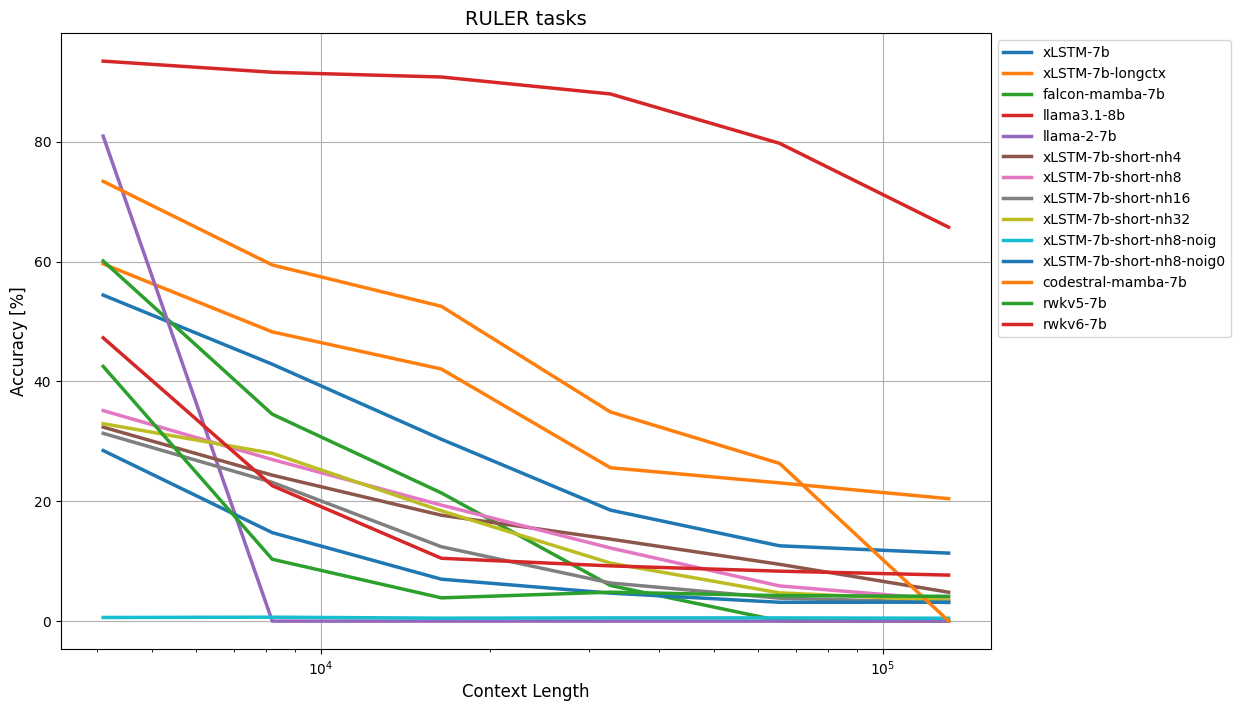

In [5]:
plot_avg_table(average_accuracies, benchmark_dir=base_path)


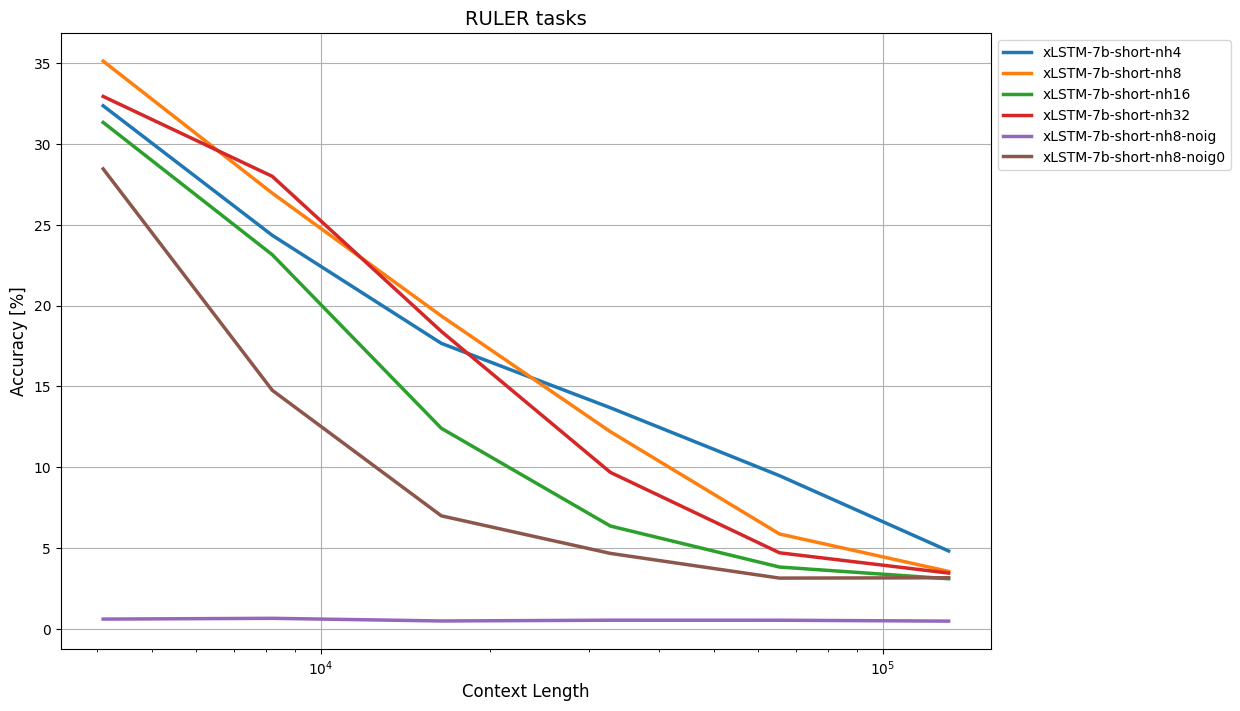

In [6]:
plot_avg_table({key: val for key, val in average_accuracies.items() if "nh" in key}, benchmark_dir=base_path, plotname="num_head")

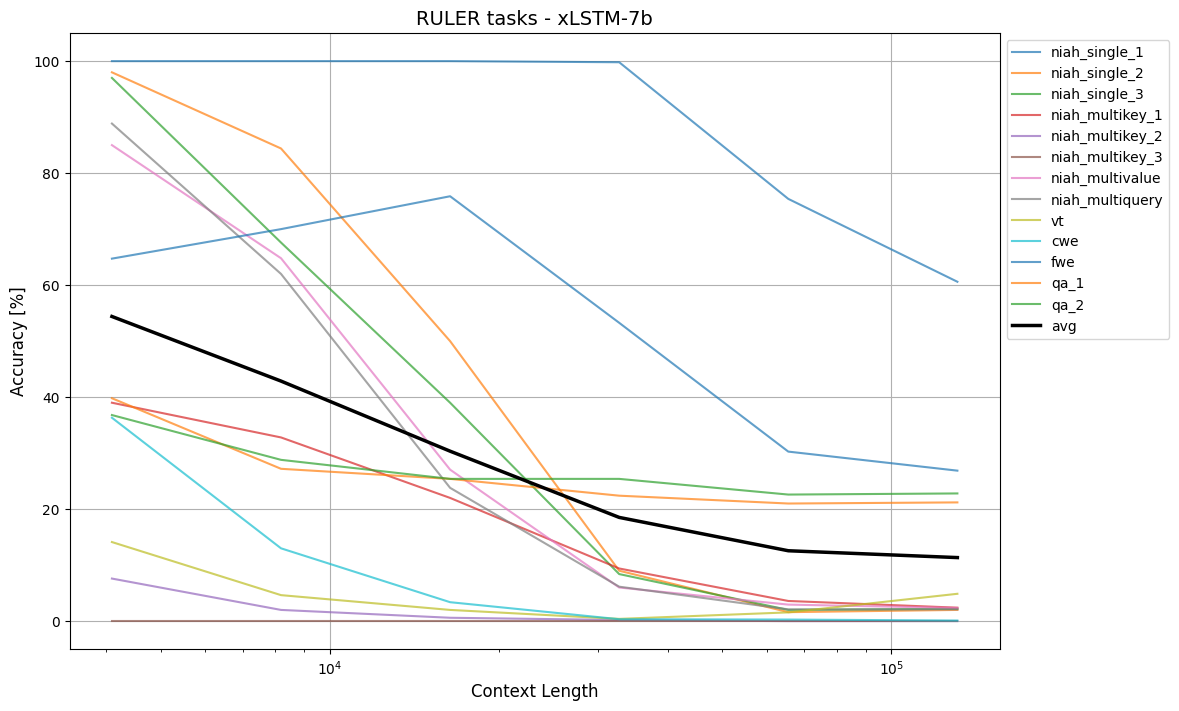

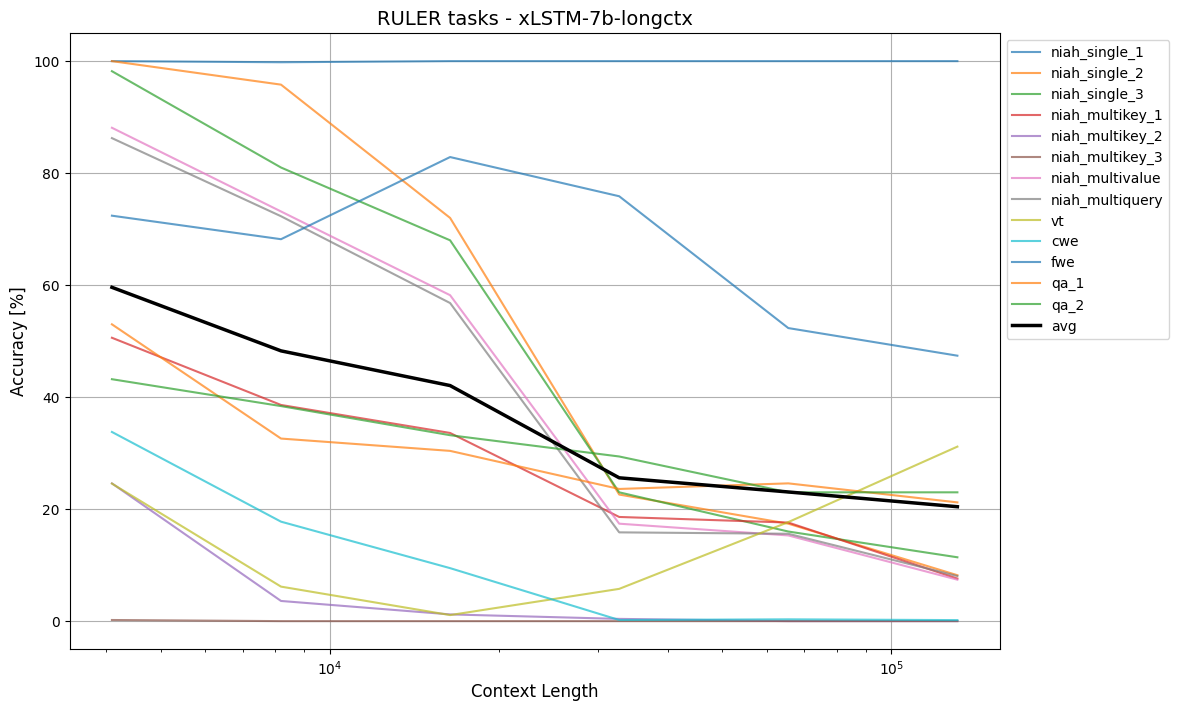

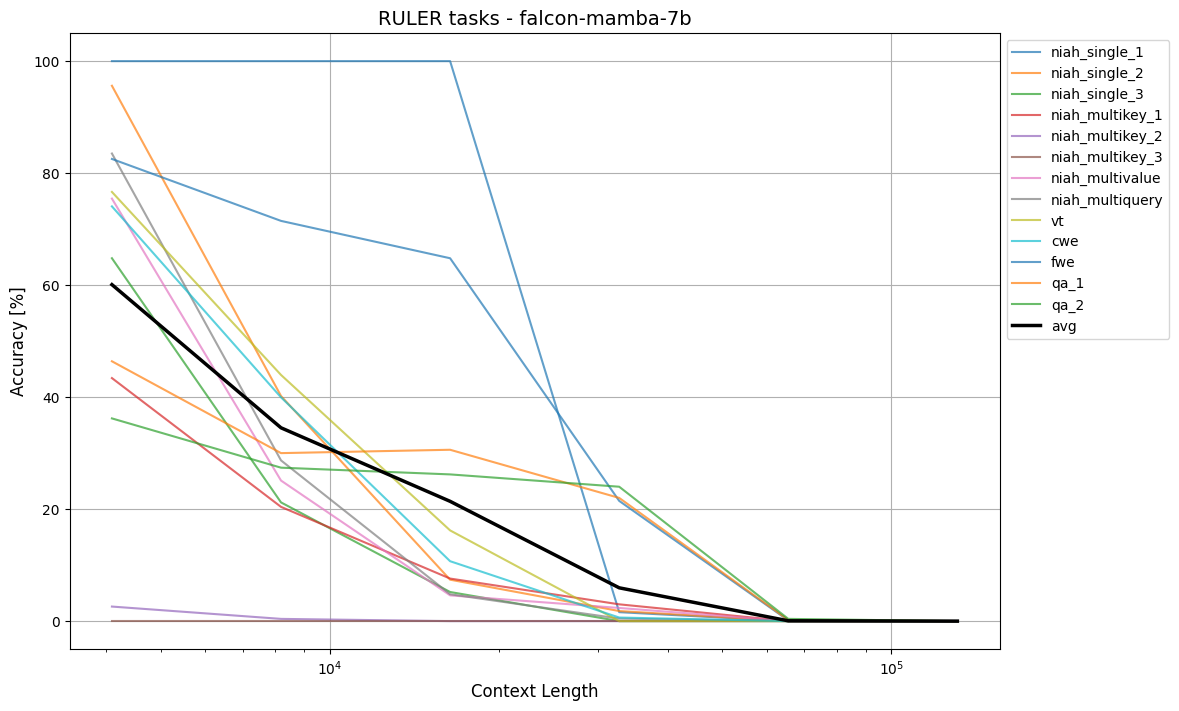

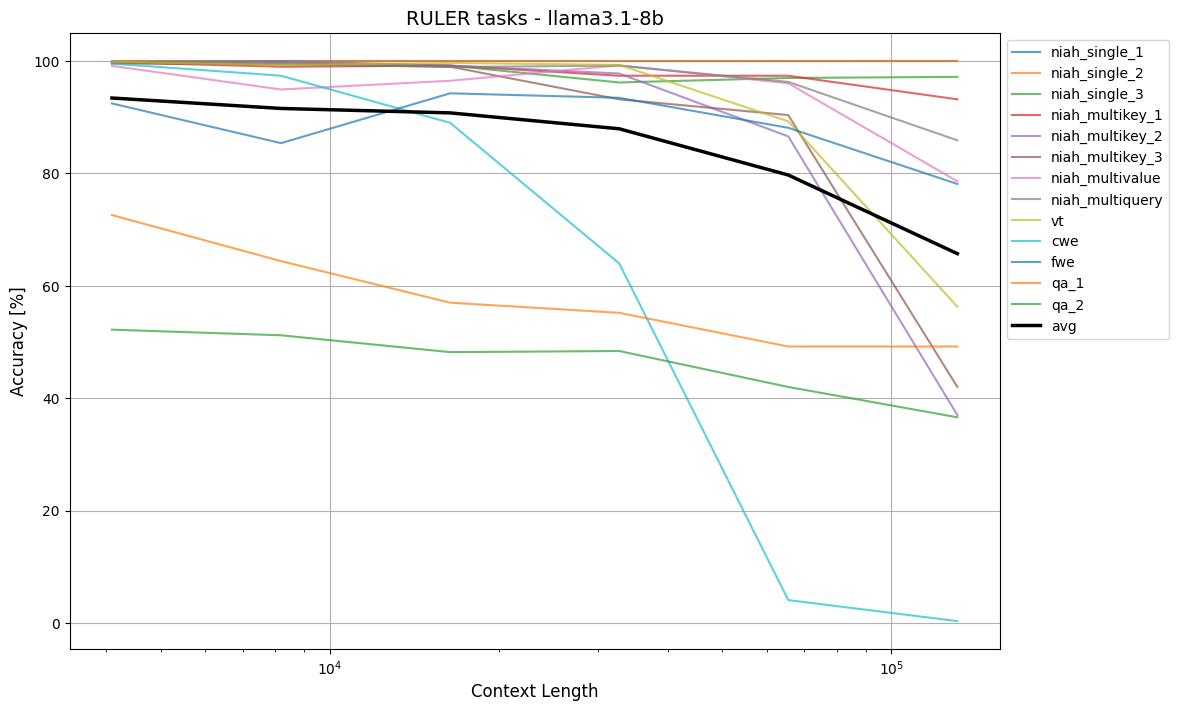

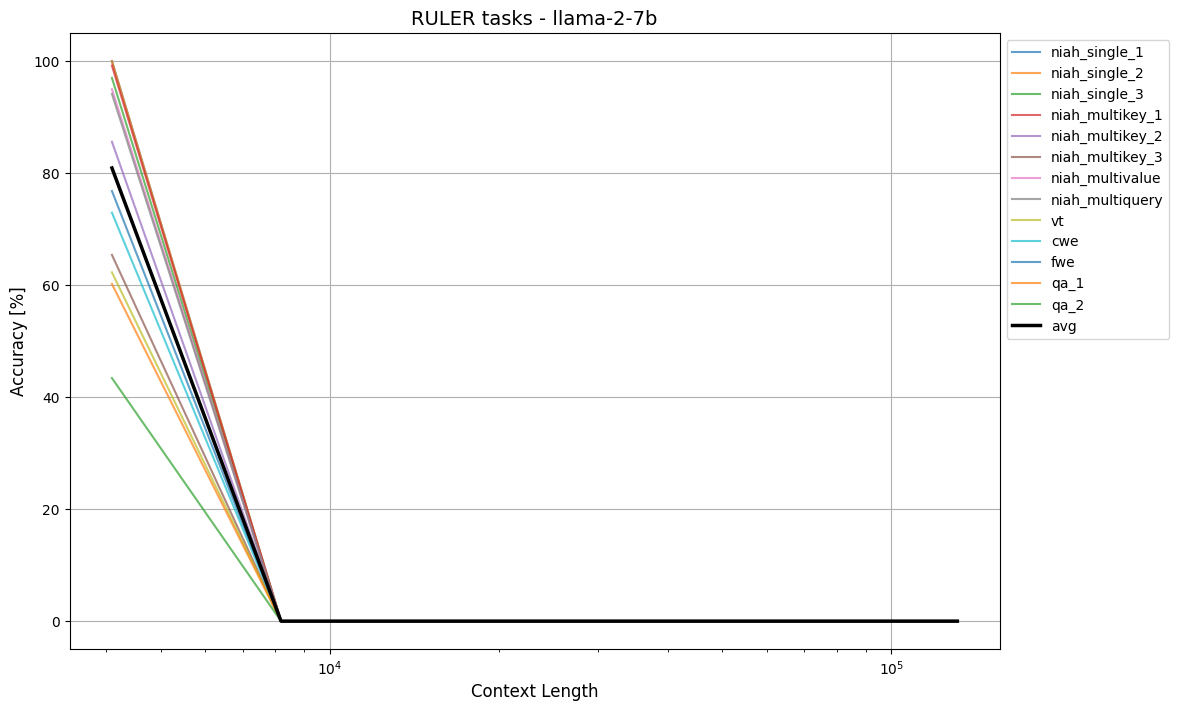

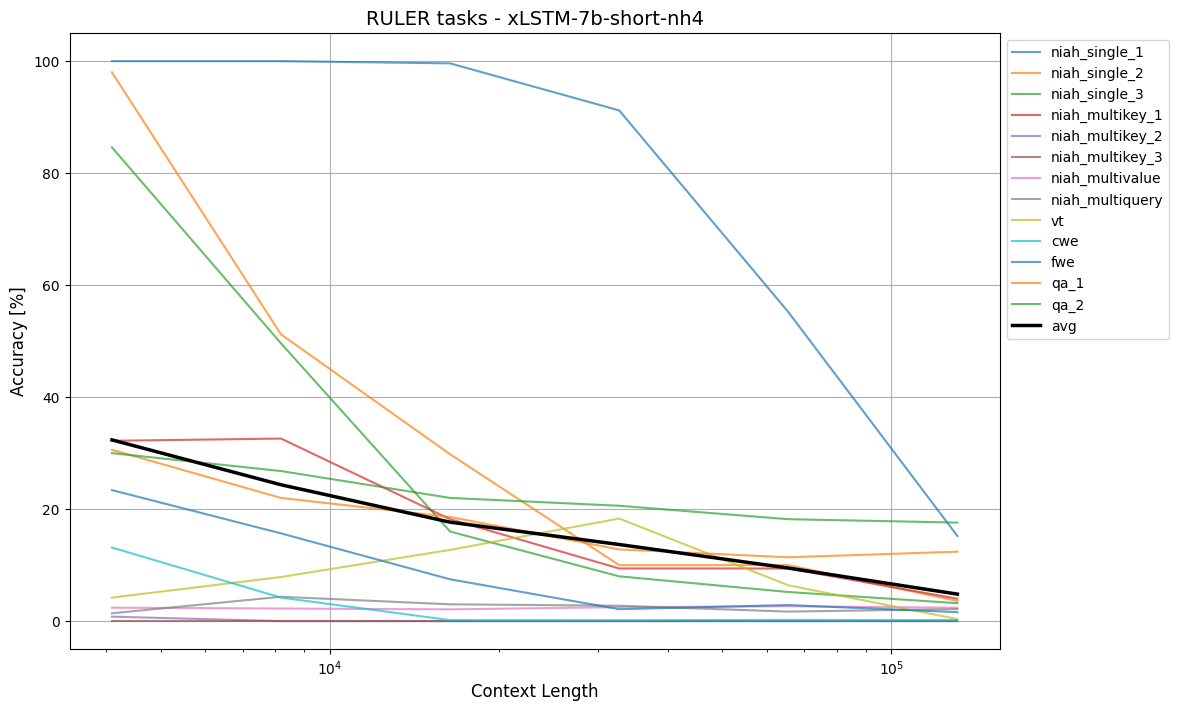

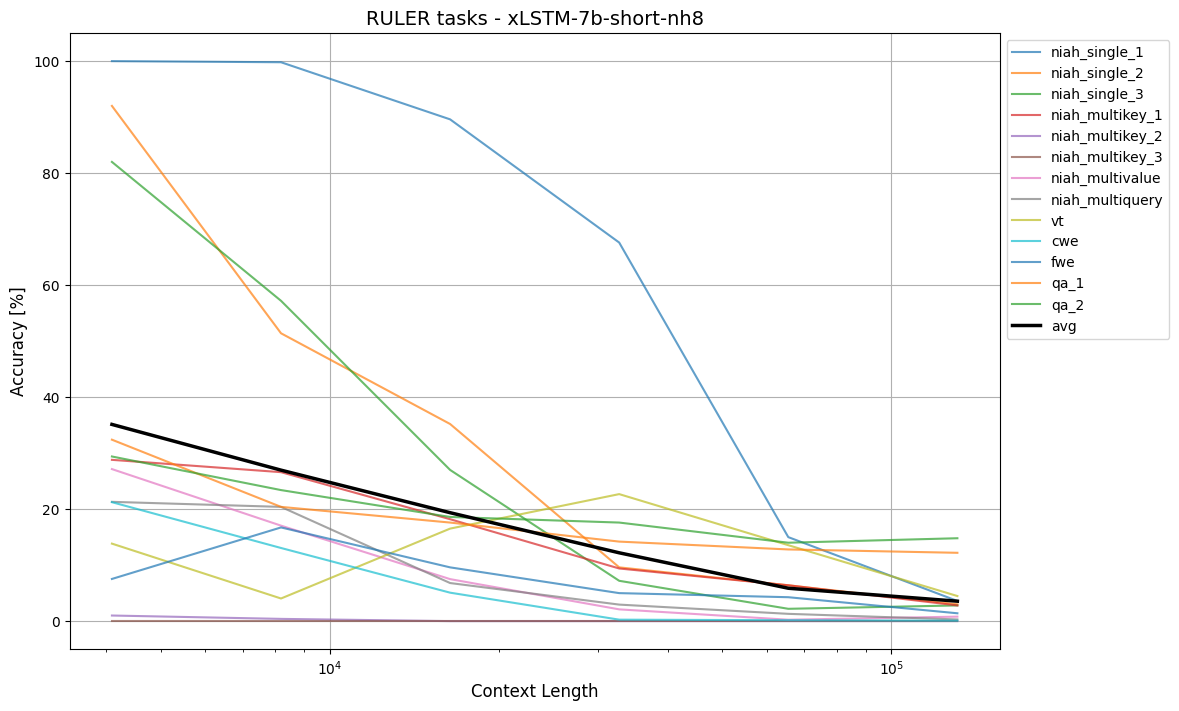

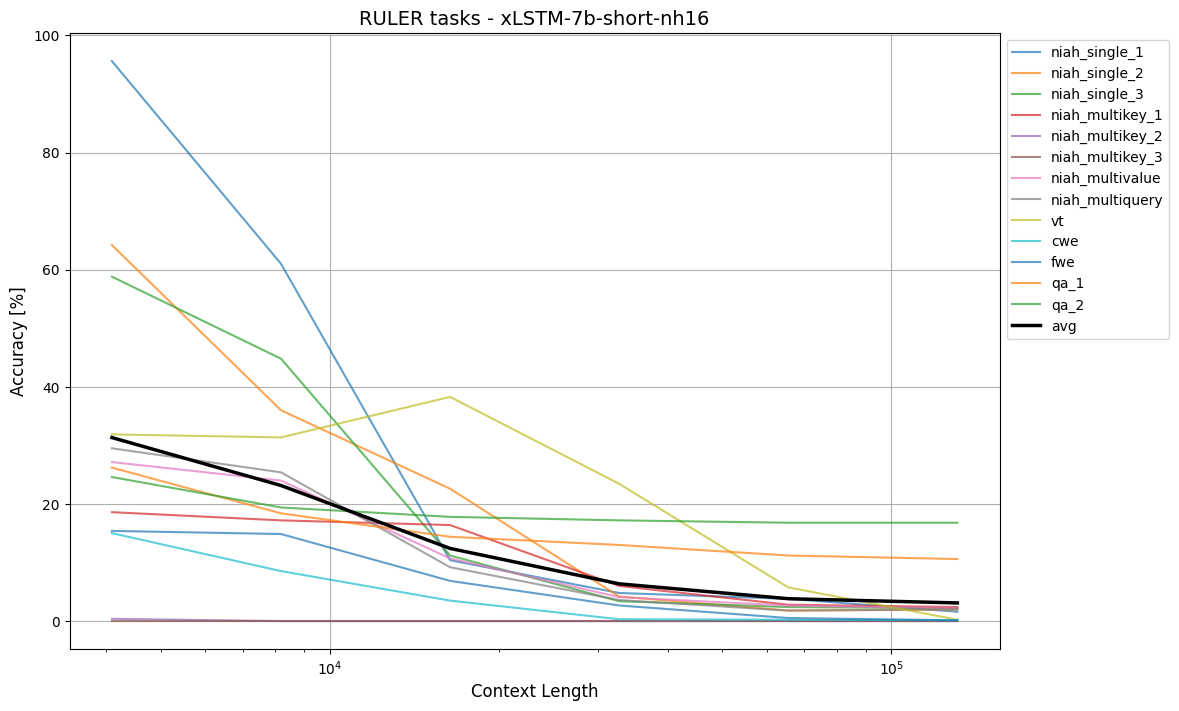

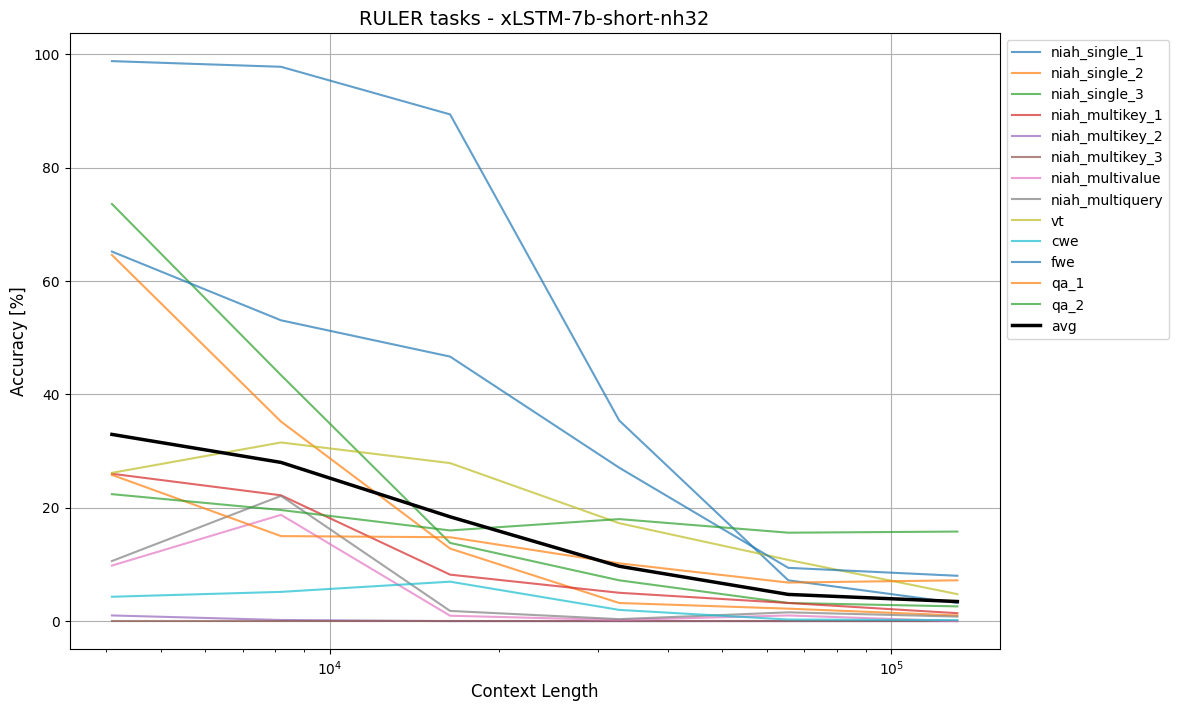

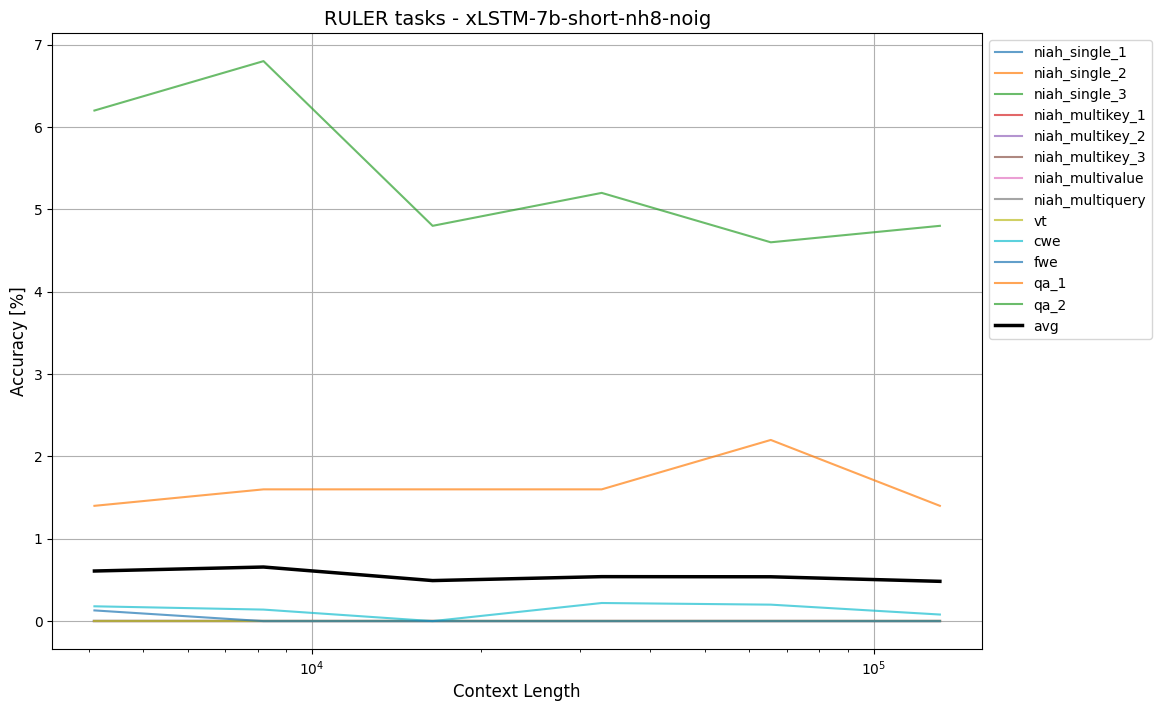

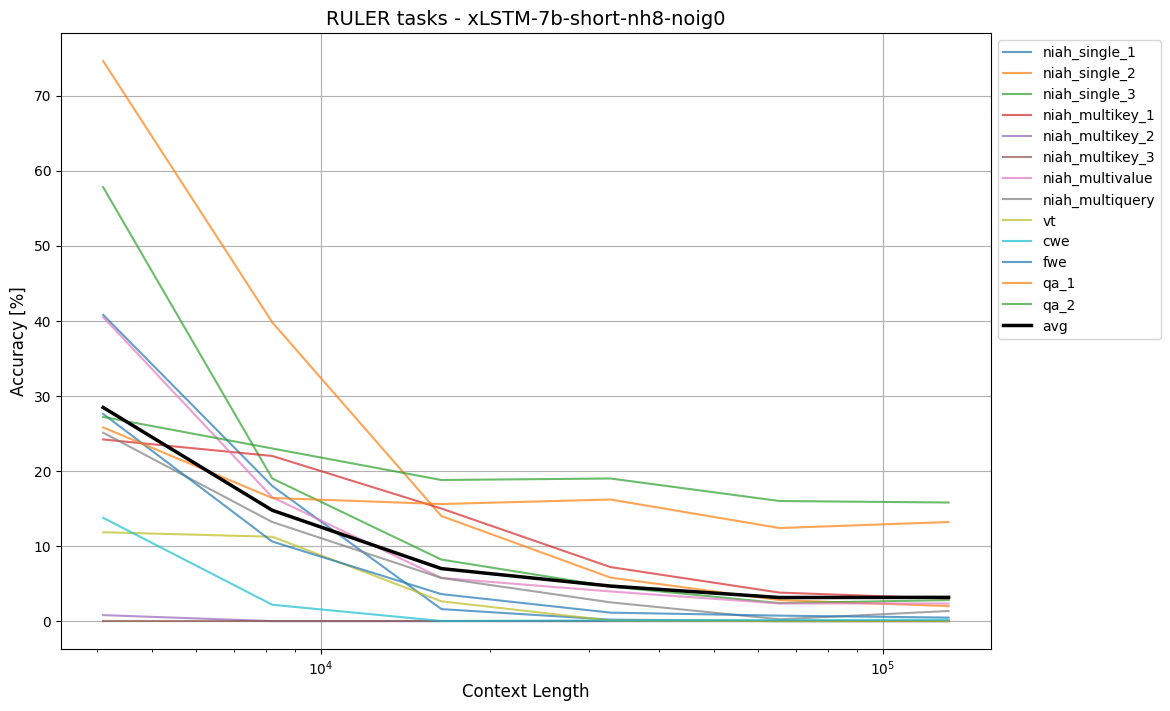

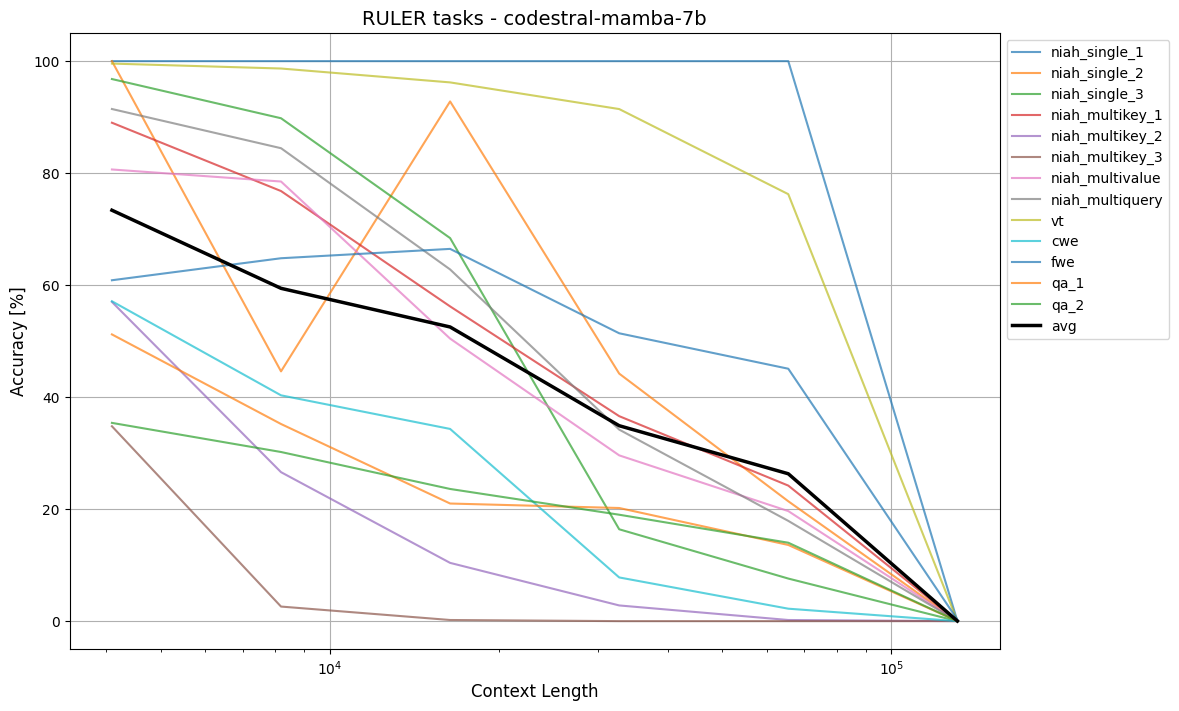

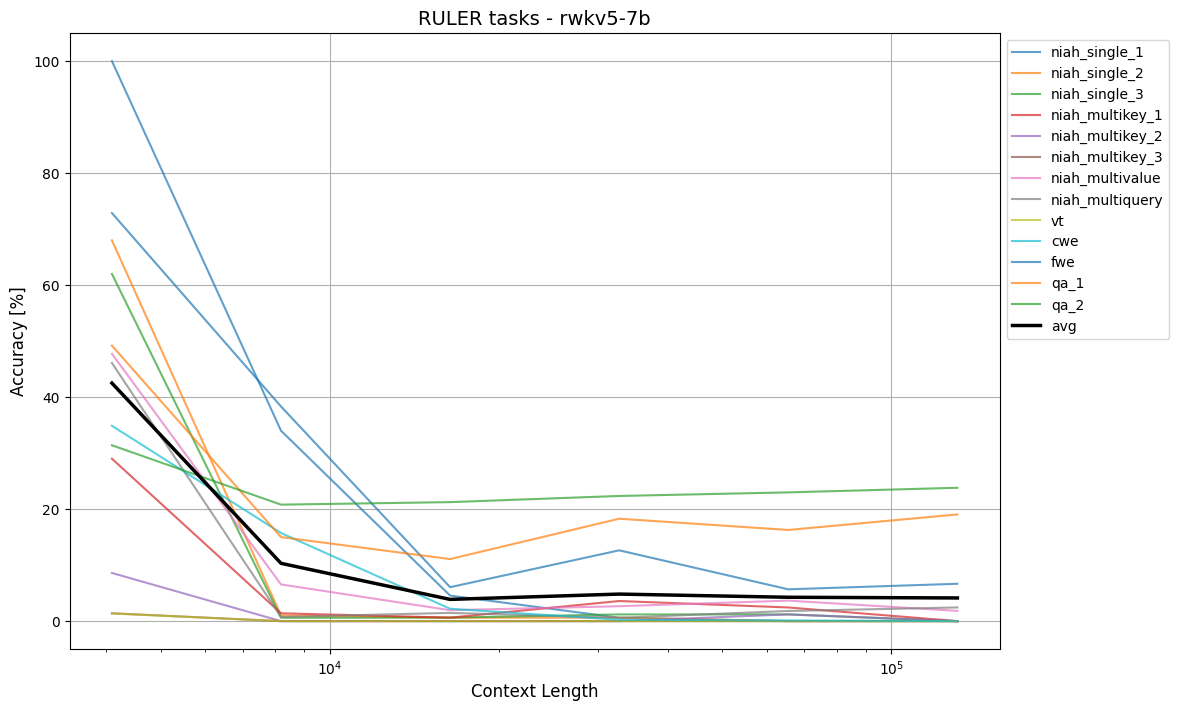

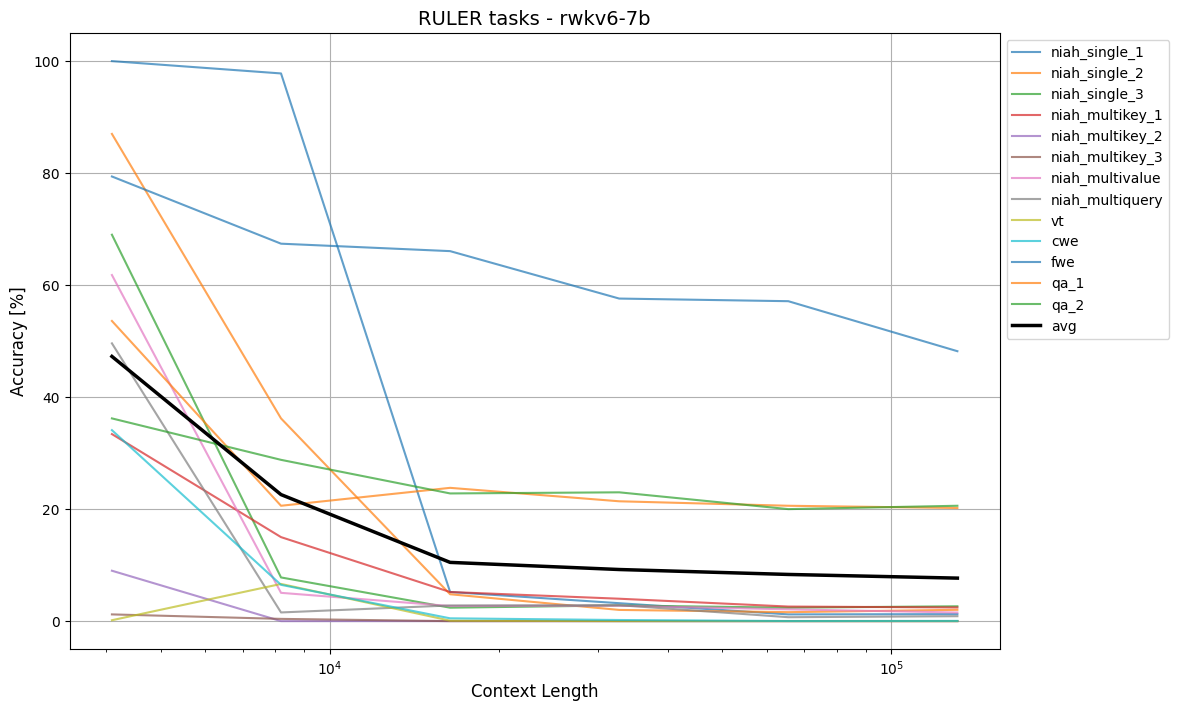

In [7]:
for name in models:
    plot_table(data=all_accuracies[name], name=name, savefig=True, benchmark_dir=base_path)

## PaperPlots

In [8]:
from mlstm_kernels.utils.benchmark.plot_results_for_paper import (
    plot_benchmark_result_table,
    plot_combined_benchmark_result_table,
    rc_context_wrapper,
    rc_context_wrapper_single_col_plot,
    select_columns,
    savefig,
)
from pathlib import Path
import sys
sys.path.append(".")
from plot_config import model_colors, model_labels
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt

from mlstm_kernels.utils.benchmark.plot_config_for_paper import FIGSIZE, FIGSIZE_2COL

In [9]:
average_accuracies

{'xLSTM-7b': ctx_length
 65536     12.566154
 32768     18.519999
 16384     30.346153
 8192      42.864616
 131072    11.346154
 4096      54.401535
 Name: avg, dtype: float32,
 'xLSTM-7b-longctx': ctx_length
 65536     23.063847
 32768     25.590769
 16384     42.062309
 8192      48.259232
 4096      59.606930
 131072    20.429996
 Name: avg, dtype: float32,
 'falcon-mamba-7b': ctx_length
 16384     21.392307
 4096      60.090778
 65536      0.056154
 32768      5.946923
 131072     0.000000
 8192      34.522305
 Name: avg, dtype: float32,
 'llama3.1-8b': ctx_length
 16384     90.786148
 8192      91.575394
 4096      93.435379
 131072    65.725388
 65536     79.724617
 32768     87.956924
 Name: avg, dtype: float32,
 'llama-2-7b': ctx_length
 131072     0.000000
 65536      0.000000
 32768      0.000000
 16384      0.000000
 8192       0.000000
 4096      80.920769
 Name: avg, dtype: float32,
 'xLSTM-7b-short-nh4': ctx_length
 131072     4.822307
 65536      9.480000
 32768     13.

(21.0, 13.5)


KeyError: 'rwkv5-7b'

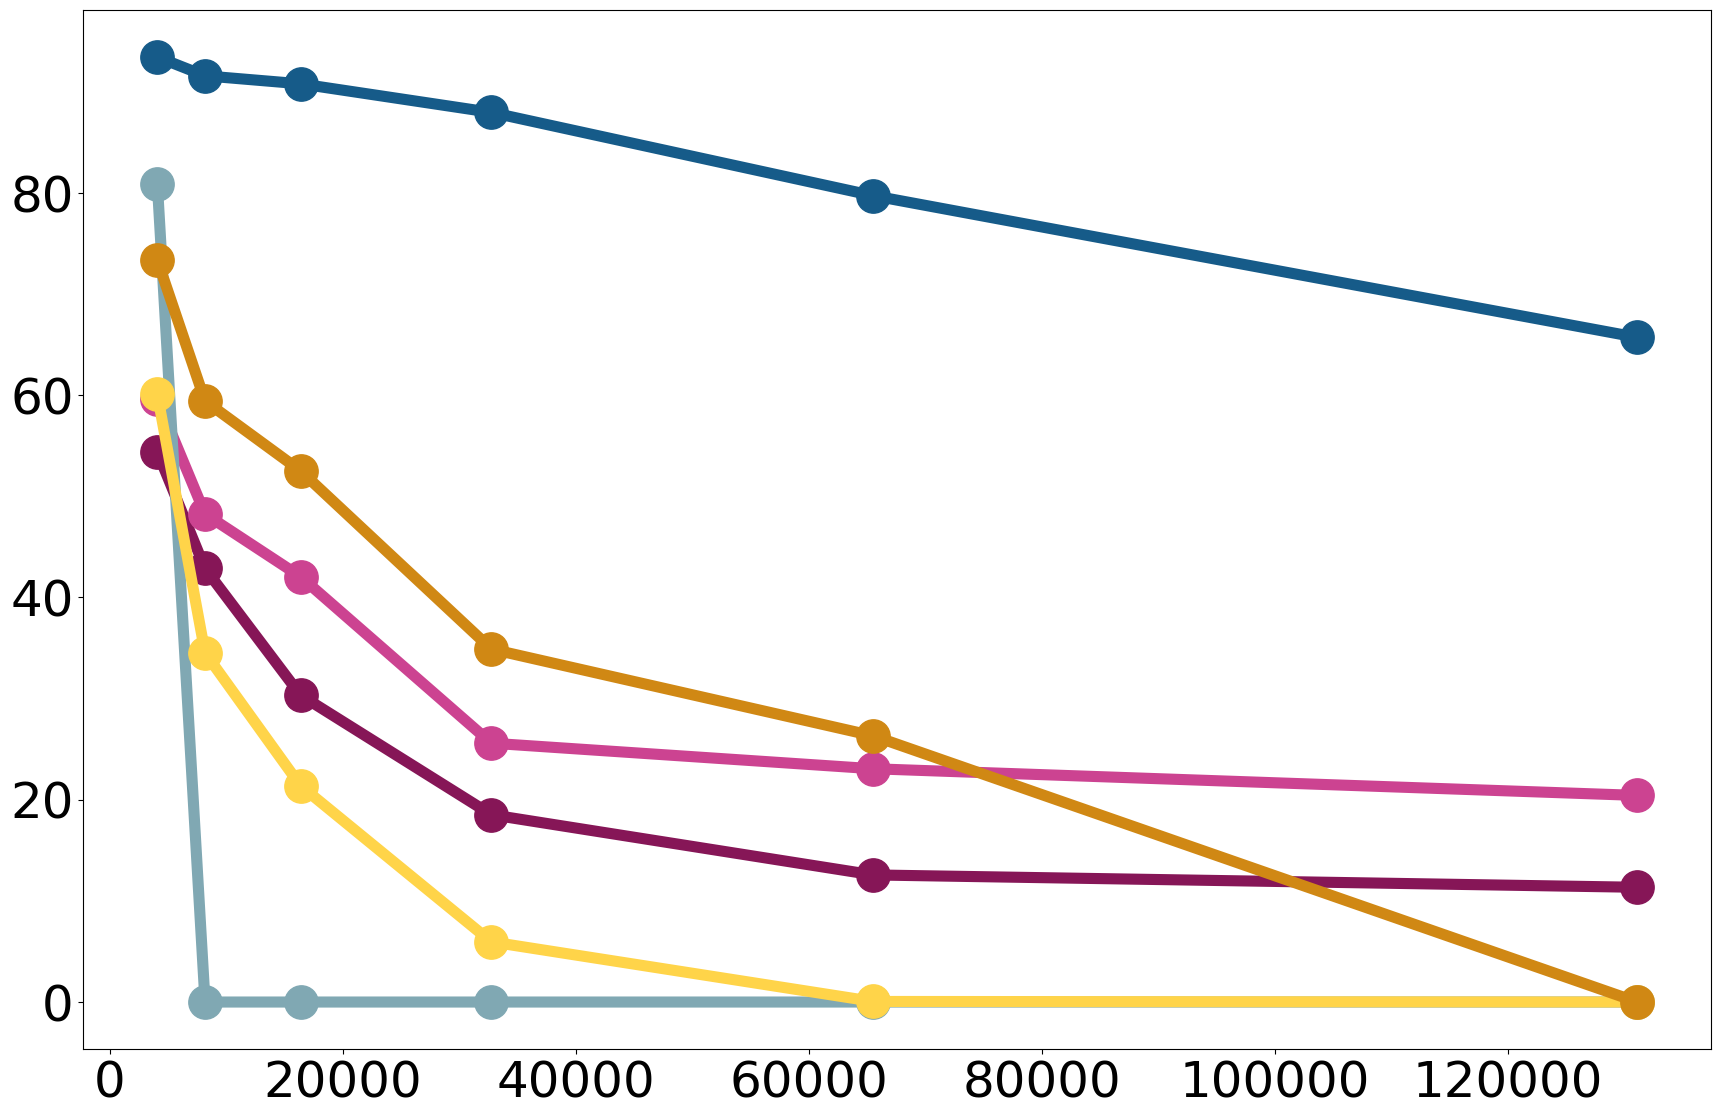

In [14]:
#  Copyright (c) NXAI GmbH.
#  This software may be used and distributed according to the terms of the NXAI Community License Agreement.

#  Copyright (c) NXAI GmbH.
#  This software may be used and distributed according to the terms of the NXAI Community License Agreement.

FONTSIZE = 12
SMALL_OFFSET = 1
FONTSIZE_SMALL = FONTSIZE - SMALL_OFFSET
FONTSIZE_TICKS = 9
fontsize_delta = 0

MARKERSIZE = 6.0
LINEWIDTH = 2.0 # default 1.5

nice_look_term = 4
make_font_smaller_term = 0
FIGSIZE_2COL = (6.75 + 0.25 + nice_look_term + make_font_smaller_term,
                 4.5 + make_font_smaller_term)   # ICML width of page: 6.75 inches + 0.25 inches between columns
adjust_fig_to_reach_legend_border_term = 3
one_col_fig_size_factor = 1.5
FIGSIZE = (one_col_fig_size_factor * (FIGSIZE_2COL[0] + adjust_fig_to_reach_legend_border_term),
           one_col_fig_size_factor * (FIGSIZE_2COL[1] * 2))

GRIDSPEC_KWARGS = {"wspace": 0.115, "hspace": 0}

print(FIGSIZE)

average_accuracies_main = {
    k: v for k, v in average_accuracies.items() if "nh" not in k
}

import pickle as pkl

with open("avg_acc_ruler.pkl", "wb") as fp:
    pkl.dump(average_accuracies, fp)

average_accuracies_main = {
    key: average_accuracies_main[key]
    for key in 
    ["xLSTM-7b",
    "xLSTM-7b-longctx",
    "llama-2-7b",
    "llama3.1-8b",
    "falcon-mamba-7b",
    "codestral-mamba-7b",
    "rwkv5-7b",
    "rwkv6-7b"
    ]
}

with open("avg_acc_ruler_main.pkl", "wb") as fp:
    pkl.dump(average_accuracies_main, fp)


factor = 4
with mpl.rc_context(
        rc={
            "text.usetex": False,
            "font.size": factor * (FONTSIZE + fontsize_delta),
            "axes.labelsize": factor * (FONTSIZE + fontsize_delta),
            "legend.fontsize": (factor - 1) * (FONTSIZE_SMALL + fontsize_delta),
            "xtick.labelsize": factor * (FONTSIZE_TICKS + fontsize_delta),
            "ytick.labelsize": factor * (FONTSIZE_TICKS + fontsize_delta),
            "axes.titlesize": factor * (FONTSIZE + fontsize_delta),
            "lines.markersize": factor * MARKERSIZE,
            "lines.linewidth": factor * LINEWIDTH,
        }
    ):
    
    fig, ax = plt.subplots(figsize=FIGSIZE)
    for row in average_accuracies_main:
        ax.plot(average_accuracies_main[row].sort_index(), label=model_labels[row], c=model_colors[row], marker='o')
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_xlabel("Context Length [Tokens]")
    ax.set_ylabel("Average Accuracy [%]")
    ax.grid(alpha=0.2)
    ax.set_ylim(0, 110)
    ax.set_xscale('log')
    ax.set_xticks([4096, 8192, 16384, 32768, 65536, 131072])
    ax.set_xticklabels([4096, 8192, 16384, 32768, 65536, 131072])
    ax.legend(loc="upper center", ncols=3, bbox_to_anchor=(0.5, 1.1), frameon=False)
    savefig(fig, "RULER_avg_main")

(21.0, 13.5)


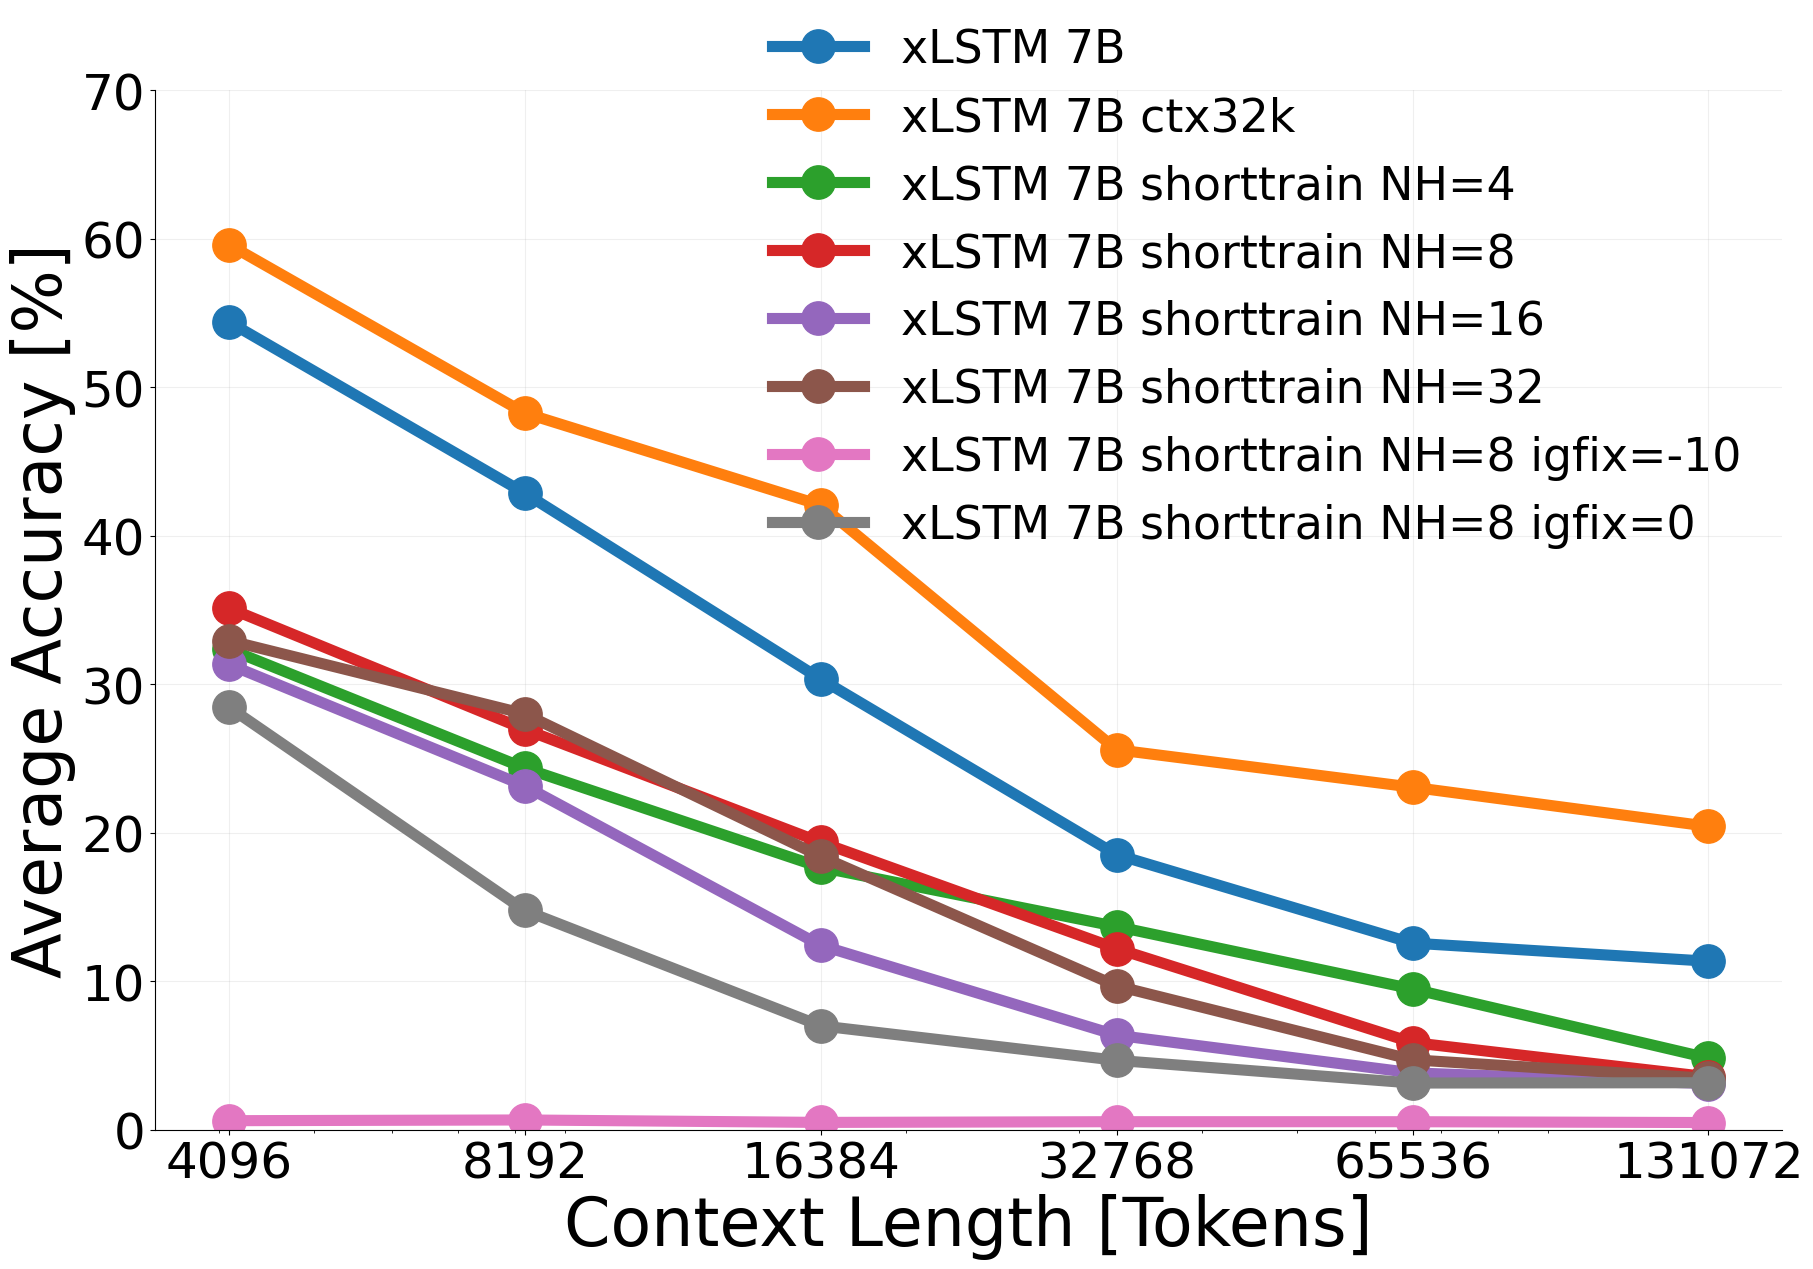

In [15]:
#  Copyright (c) NXAI GmbH.
#  This software may be used and distributed according to the terms of the NXAI Community License Agreement.



GRIDSPEC_KWARGS = {"wspace": 0.115, "hspace": 0}

print(FIGSIZE)

average_accuracies_abl = {
    k: v for k, v in average_accuracies.items() if "xLSTM" in k
}

with open("avg_acc_ruler_abl.pkl", "wb") as fp:
    pkl.dump(average_accuracies_abl, fp)

factor = 4
with mpl.rc_context(
        rc={
            "text.usetex": False,
            "font.size": factor * (FONTSIZE + fontsize_delta),
            "axes.labelsize": factor * (FONTSIZE + fontsize_delta),
            "legend.fontsize": (factor - 1) * (FONTSIZE_SMALL + fontsize_delta),
            "xtick.labelsize": factor * (FONTSIZE_TICKS + fontsize_delta),
            "ytick.labelsize": factor * (FONTSIZE_TICKS + fontsize_delta),
            "axes.titlesize": factor * (FONTSIZE + fontsize_delta),
            "lines.markersize": factor * MARKERSIZE,
            "lines.linewidth": factor * LINEWIDTH,
        }
    ):
    
    fig, ax = plt.subplots(figsize=FIGSIZE)
    for row in average_accuracies_abl:
        ax.plot(average_accuracies_abl[row].sort_index(), label=model_labels[row], marker='o')
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_xlabel("Context Length [Tokens]")
    ax.set_ylabel("Average Accuracy [%]")
    ax.grid(alpha=0.2)
    ax.set_ylim(0, 70)
    ax.set_xscale('log')
    ax.set_xticks([4096, 8192, 16384, 32768, 65536, 131072])
    ax.set_xticklabels([4096, 8192, 16384, 32768, 65536, 131072])
    ax.legend(loc="upper right", ncols=1, frameon=False, bbox_to_anchor=(1., 1.1))
    savefig(fig, "RULER_avg_abl")

In [12]:
average_accuracies_abl

{'xLSTM-7b': ctx_length
 65536     12.566154
 32768     18.519999
 16384     30.346153
 8192      42.864616
 131072    11.346154
 4096      54.401535
 Name: avg, dtype: float32,
 'xLSTM-7b-longctx': ctx_length
 65536     23.063847
 32768     25.590769
 16384     42.062309
 8192      48.259232
 4096      59.606930
 131072    20.429996
 Name: avg, dtype: float32,
 'xLSTM-7b-short-nh4': ctx_length
 131072     4.822307
 65536      9.480000
 32768     13.681540
 16384     17.666924
 8192      24.349998
 4096      32.364616
 Name: avg, dtype: float32,
 'xLSTM-7b-short-nh8': ctx_length
 131072     3.558461
 65536      5.872307
 32768     12.199230
 16384     19.361540
 8192      26.960001
 4096      35.127689
 Name: avg, dtype: float32,
 'xLSTM-7b-short-nh16': ctx_length
 131072     3.103846
 65536      3.829231
 32768      6.363846
 16384     12.411538
 8192      23.151537
 4096      31.334616
 Name: avg, dtype: float32,
 'xLSTM-7b-short-nh32': ctx_length
 131072     3.456923
 65536      4.7